In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Cargar datos

In [86]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

df['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

## Estadísticas Básicas


In [87]:
# Veamos qué columnas tiene nuestro dataset
print(breast_cancer.feature_names, "\n")

mean_radius = np.array(df["mean radius"])
print("Existen ", mean_radius.shape, "muestras")

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Existen  (569,) muestras


In [88]:
# Media, mediana, desviación típica
print("Media: ", np.mean(mean_radius))
print("Mediana: ", np.median(mean_radius))
print("Desviación típica", np.std(mean_radius))

Media:  14.127291739894552
Mediana:  13.37
Desviación típica 3.520950760711062


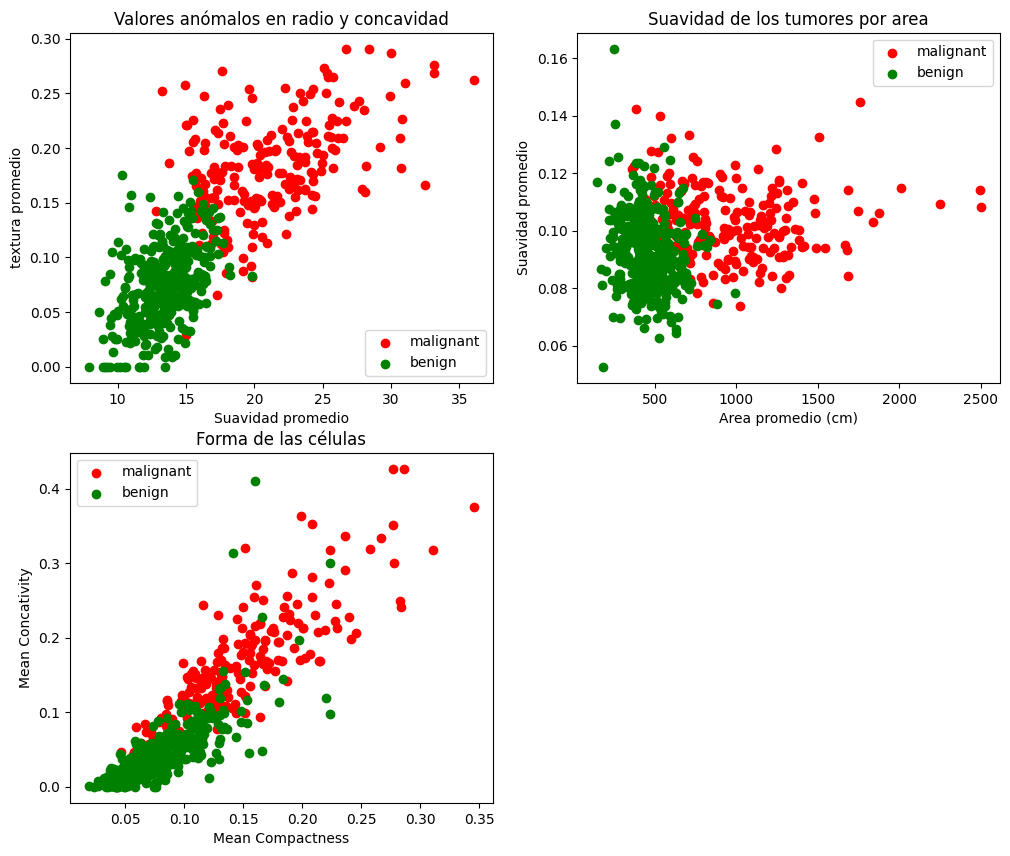

In [92]:
# Vamos a mostrar diferentes características para comparar los 
colors = ['red', 'green']

# Relación suavidad - textura, para comprobar si las irregularidades en la forma están relacionadas con la malignidad

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
for i in range(2):
    plt.scatter(df[df['target'] == i]['worst radius'],
                df[df['target'] == i]['worst concave points'],
                label=breast_cancer.target_names[i], color=colors[i])
plt.xlabel('Suavidad promedio')
plt.ylabel('textura promedio')
plt.title('Valores anómalos en radio y concavidad')
plt.legend()


# Relación area - suavidad, para comprobar si los tumores con areas mayores, son más irregulares
plt.subplot(2,2,2)
for i in range(2):
    plt.scatter(df[df['target'] == i]['mean area'],
                df[df['target'] == i]['mean smoothness'],
                label=breast_cancer.target_names[i], color=colors[i])

plt.xlabel('Area promedio (cm)')
plt.ylabel('Suavidad promedio')
plt.title('Suavidad de los tumores por area')
plt.legend()

# Relación compactness - concativity, para comprobar si la forma de los tumores influye en la malignidad
plt.subplot(2,2,3)
for i in range(2):
    plt.scatter(df[df['target'] == i]['mean compactness'],
                df[df['target'] == i]['mean concavity'],
                label=breast_cancer.target_names[i], color=colors[i])

plt.xlabel('Mean Compactness')
plt.ylabel('Mean Concativity')
plt.title('Forma de las células')
plt.legend()

plt.show()
